In [1]:
import os
import pcse
%matplotlib inline
import matplotlib.pyplot as plt
data_dir = r'C:\Users\nstoddar\Dev\temp\quickstart_part2'


In [2]:
from pcse.fileinput import CABOFileReader
cropfile = os.path.join(data_dir, 'sug0601.crop')
cropdata = CABOFileReader(cropfile)
print(cropdata)

** $Id: sug0601.cab 1.3 1997/09/25 14:07:02 LEM release $
** File SUG0601.CAB
** CROP DATA FILE for use with WOFOST Version 5.4, June 1992
**
** SUGAR BEET 601
** Regions : Germany, Northern and Central France, Netherlands, Belgium,
**           Luxembourg, UK, Ireland, Denmark
** Sowing date : between 1 and 10 April
** mean date of harvest : between 17 and 27 October
** Derived from SUCROS87 data set for sugar beet.
** Calibrated for use in WOFOST model at the Centre for Agrobiological
** Research (CABO-DLO) for the simulation of crop growth and yield on the
** basis of daily weather data.
** Purpose of application: Crop growth monitoring with agrometeorological
** model in the EC.
** Developed in the framework of JRC Agriculture Project Action 3.
------------------------------------
DTSMTB: [0.0, 0.0, 3.0, 0.0, 21.0, 18.0, 35.0, 18.0] <type 'list'>
CVR: 0.72 <type 'float'>
CVS: 0.69 <type 'float'>
EFFTB: [0.0, 0.45, 40.0, 0.45] <type 'list'>
CVO: 0.82 <type 'float'>
CVL: 0.72 <type '

In [3]:
soilfile = os.path.join(data_dir, 'ec3.soil')
soildata = CABOFileReader(soilfile)

In [4]:
sitedata = {
                'SSMAX'  : 0.,
                'IFUNRN' : 0,
                'NOTINF' : 0,
                'SSI'    : 0,
                'WAV'    : 100,
                'SMLIM'  : 0.03,
                'CO2'    : 360.
            }

In [5]:
from pcse.base_classes import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)


In [6]:
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'sugarbeet_calendar.amgt')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
print(agromanagement)


!!python/object/new:pcse.fileinput.yaml_agmt_loader.YAMLAgroManagementReader
listitems:
- 2000-01-01:
    CropCalendar:
      crop_end_date: 2000-10-20
      crop_end_type: harvest
      crop_id: sugar-beet
      crop_start_date: 2000-04-05
      crop_start_type: emergence
      max_duration: 300
    StateEvents: null
    TimedEvents: null



In [7]:
from pcse.db import NASAPowerWeatherDataProvider
wdp = NASAPowerWeatherDataProvider(latitude=52, longitude=5)
print(wdp)

Weather data provided by: NASAPowerWeatherDataProvider
--------Description---------
NASA/POWER Agroclimatology Daily Averaged Data
Dates (month/day/year): 01/01/1984 through 02/20/2017
Location: Latitude 52   Longitude 5
Location clarification: Integer values may indicate the lower left (south and west) corner of the one degree lat/lon region that includes the requested locations
Elevation (meters): Average for one degree lat/lon region = 5
Methodology Documentation:
*Vegetation type: "Airport": flat rough grass
----Site characteristics----
Elevation:    5.0
Latitude:  52.000
Longitude:  5.000
Data available for 1997-01-01 - 2015-10-31
Number of missing days: 53



In [8]:
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)

In [13]:
wofsim.run_till_terminate()
output = wofsim.get_output()
sumOut = wofsim.get_summary_output()
for item in sumOut:
    print item

{'DOH': datetime.date(2000, 10, 20), 'TAGP': 23700.1995860505, 'TWST': 3838.706343461271, 'DOM': None, 'TWRT': 2880.6378745918414, 'LAIMAX': 5.20813982397638, 'DOA': datetime.date(2000, 6, 9), 'DOE': datetime.date(2000, 4, 5), 'RD': 80.0, 'TWLV': 3234.5206043656226, 'DOS': None, 'CTRAT': 32.20810195620253, 'DOV': None, 'TWSO': 16626.972638223608, 'DVS': 2.223792857142857}


In [10]:
varnames = ["day", "DVS", "TAGP", "LAI", "SM"]
tmp = {}
for var in varnames:
    tmp[var] = [t[var] for t in output]

C:\Users\nstoddar\AppData\Local\Continuum\Anaconda3\envs\py2_pcse\lib\site-packages\matplotlib\figure.py:387: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


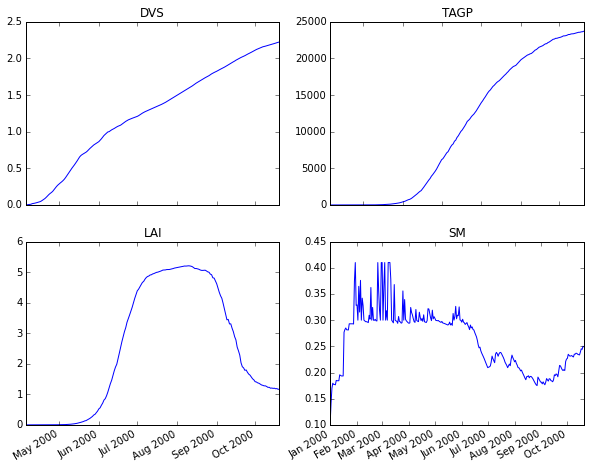

In [11]:
day = tmp.pop("day")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
for var, ax in zip(["DVS", "TAGP", "LAI", "SM"], axes.flatten()):
    ax.plot_date(day, tmp[var], 'b-')
    ax.set_title(var)
fig.autofmt_xdate()
fig.show()